# Defining Models:

In [2]:
from model import *
from global_params import *
import numpy as np
from matplotlib import pyplot as plt
from project_utils import *
import numpy as np

seg_model = get_unet()
model_classify = get_classification_model()

# Loading Model Weights:

In [3]:
model_classify.load_weights(classification_model_weights_path + 'base_model_classify.h5')
seg_model.load_weights(seg_model_weights_path + 'base_model.h5')

# Visualization of Classification model results:

Training set examples and labels:


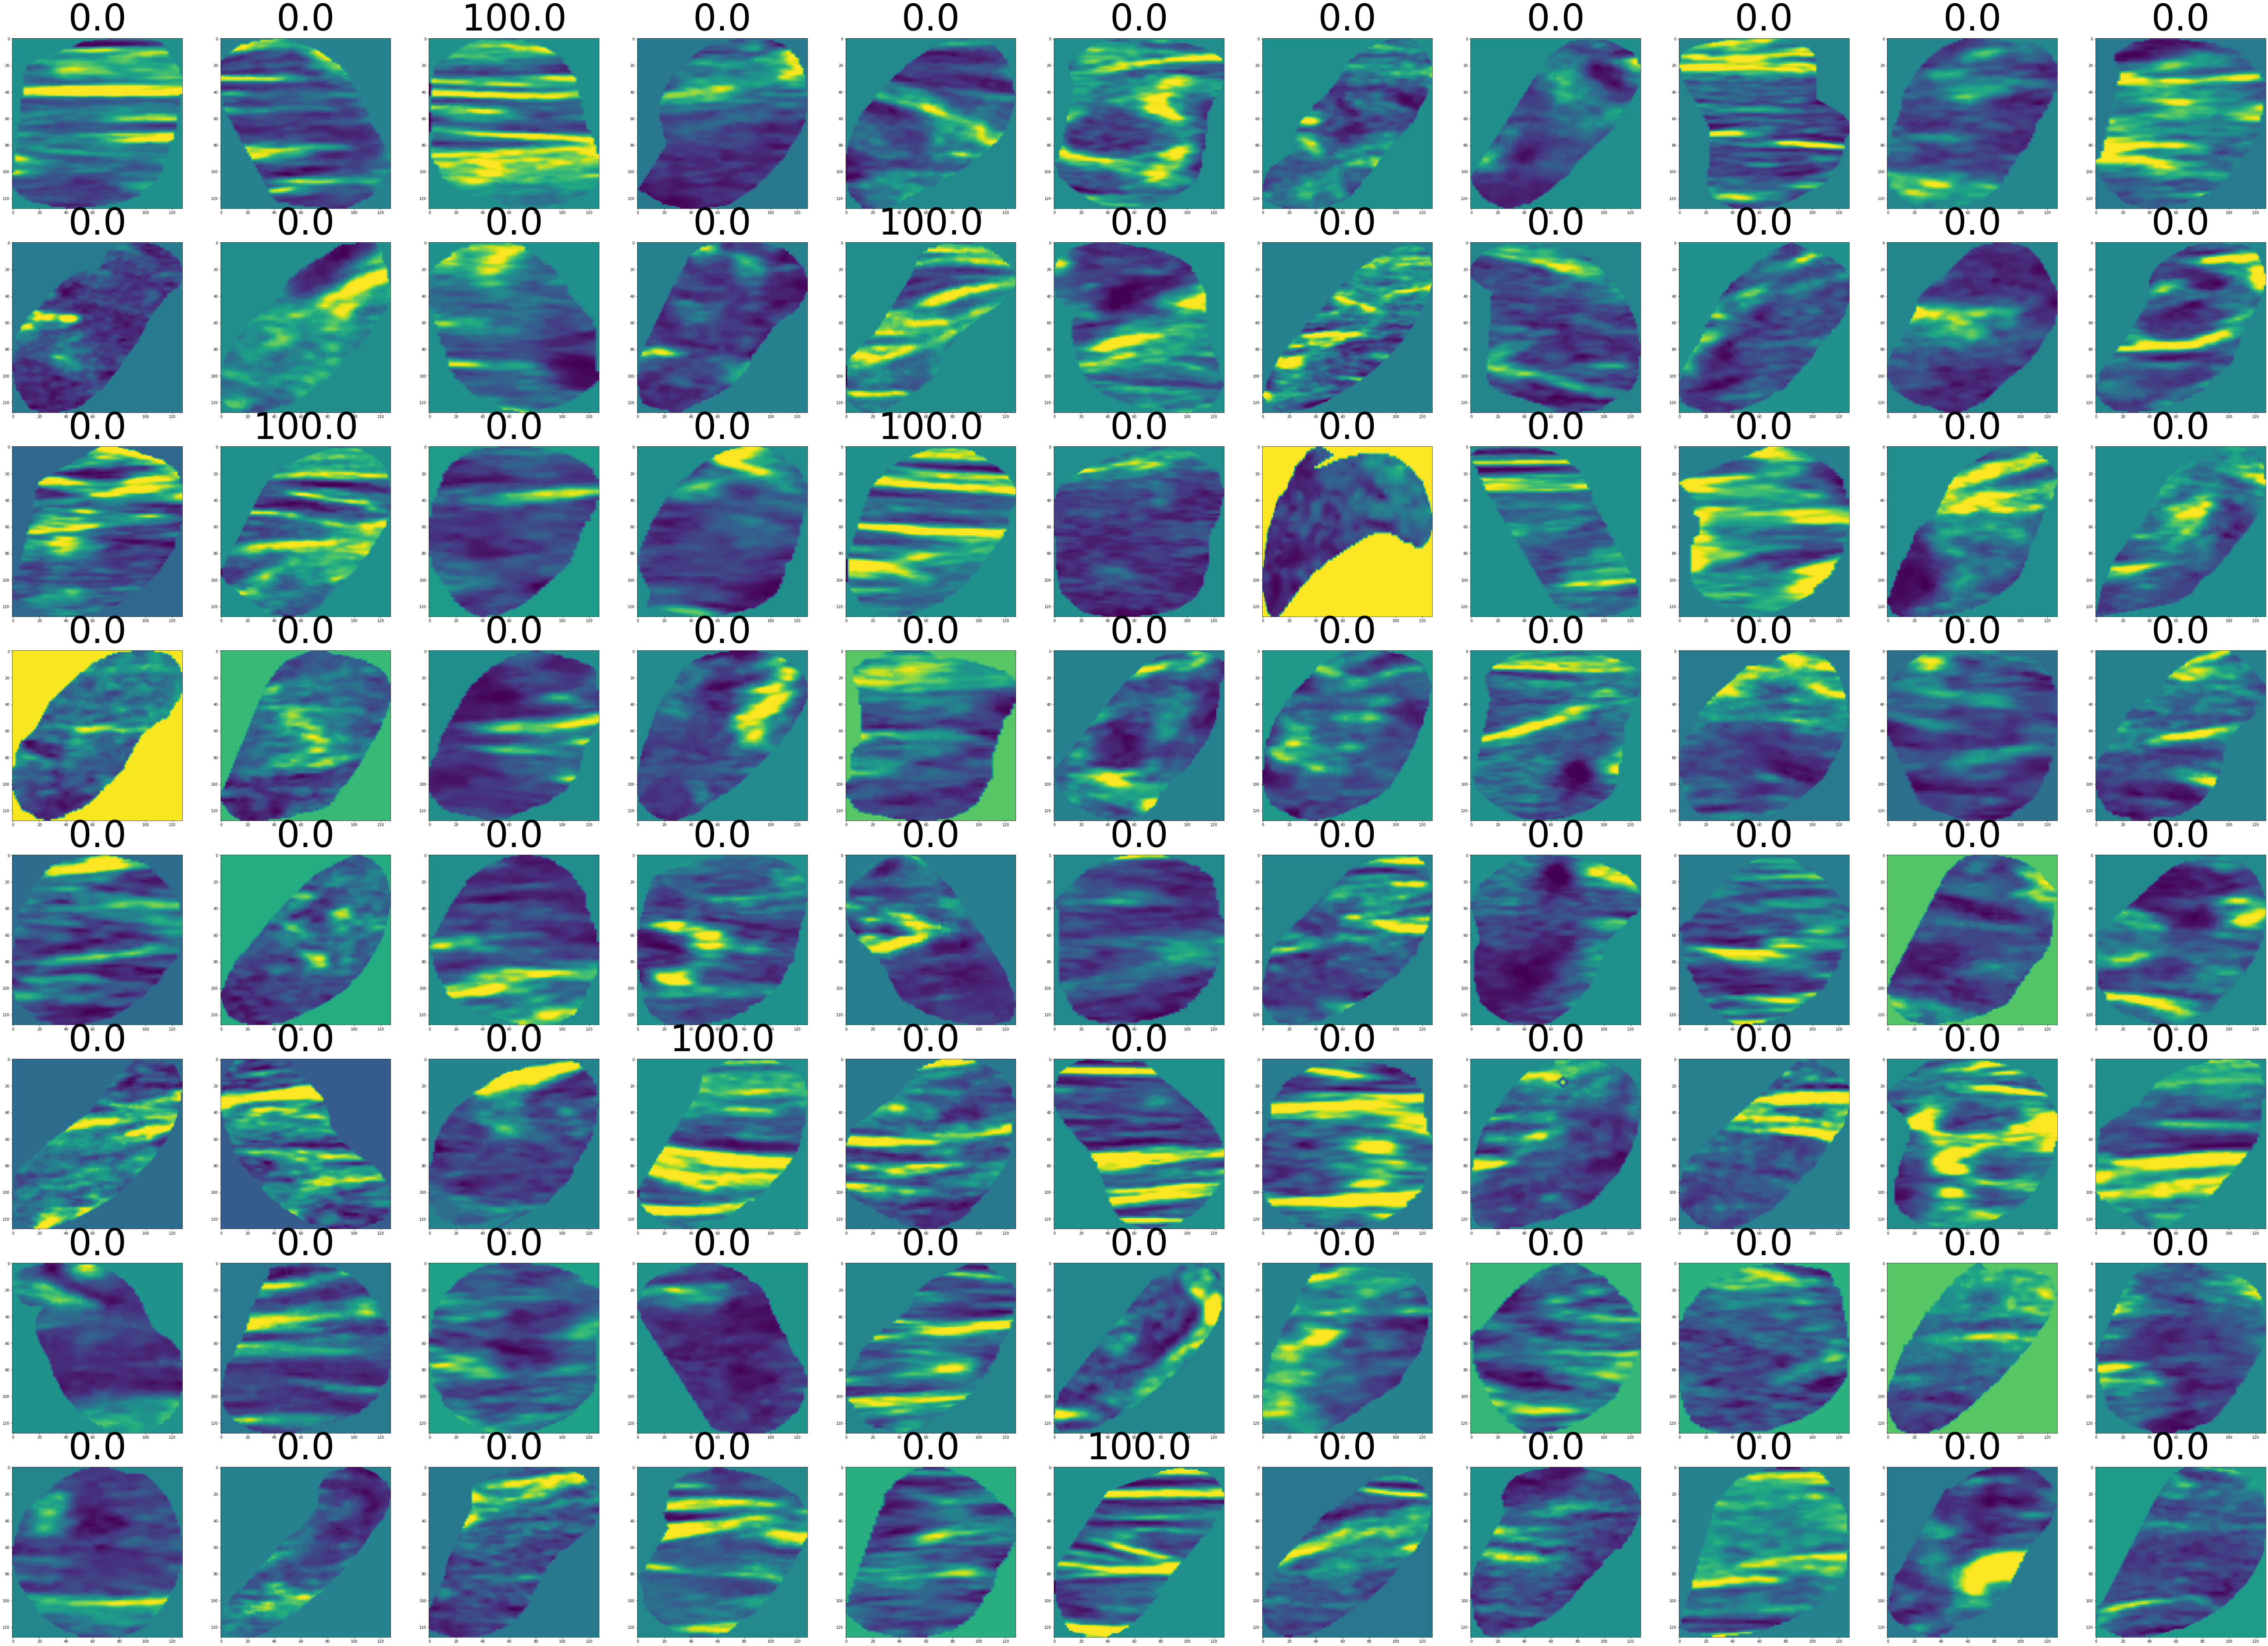

----------------------------------------
Validation set examples - true labels vs classification model predictions:


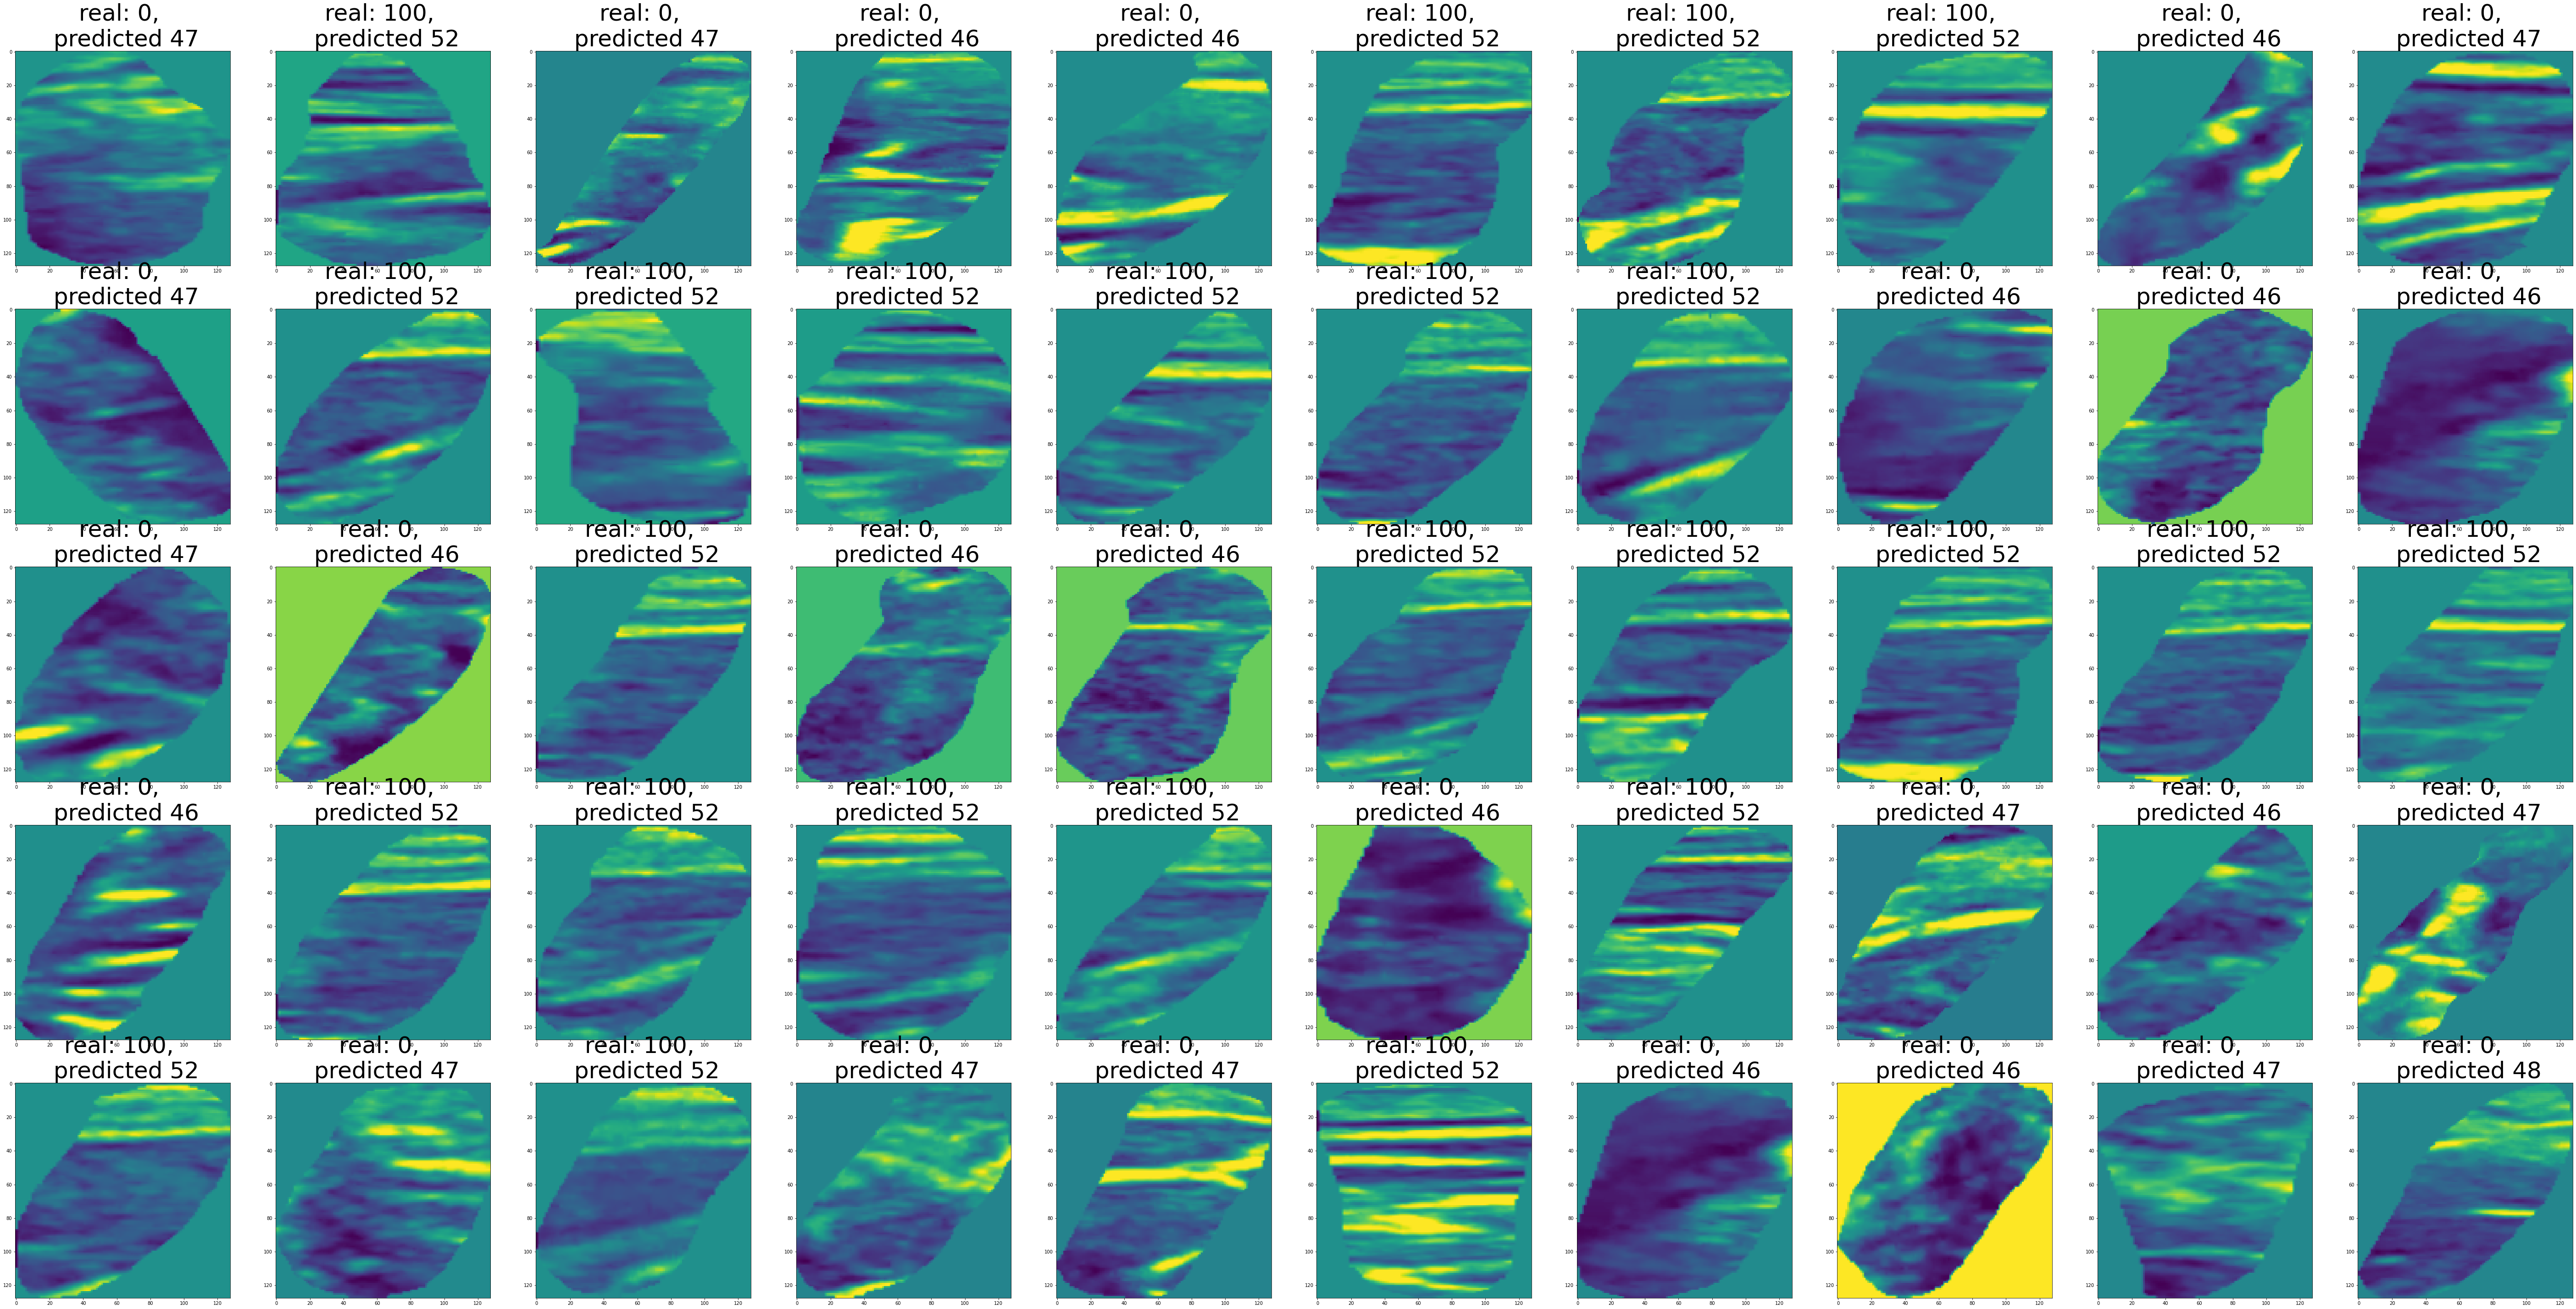

In [5]:
FIG_SIZE = 50
NUM_ROWS = 8
NUM_COLS = 11
THRESH = 0.8

iso_train_masks = np.load(np_files_path + 'iso_masks_train.npy')
train_classes = np.load(np_files_path + 'iso_masks_train_classes.npy')
iso_val_masks = np.load(np_files_path + 'iso_masks_val.npy')
val_classes = np.load(np_files_path + 'iso_masks_val_classes.npy')

train_classes_pred = model_classify.predict(iso_train_masks)
val_classes_pred = model_classify.predict(iso_val_masks)

# Training Set
print('Training set examples and labels:')
ii_train = np.random.choice(len(iso_train_masks), NUM_ROWS * NUM_COLS)
plt.figure(figsize=[NUM_COLS*10,NUM_ROWS*10])
for i in range(NUM_ROWS * NUM_COLS):
    plt.subplot(NUM_ROWS, NUM_COLS ,i+1)
    plt.title(str(train_classes[ii_train[i], 0]*100), fontsize=100)
    img = iso_train_masks[ii_train[i], :, :, 0]
    plt.imshow(img)
plt.show()

print('----------------------------------------')
print('Validation set examples - true labels vs classification model predictions:')
#validation set
FIG_SIZE = 50
NUM_ROWS = 5
NUM_COLS = 10
THRESH = 0.8
ii_val = np.random.choice(len(iso_val_masks), NUM_ROWS * NUM_COLS)

plt.figure(figsize=[NUM_COLS*10,NUM_ROWS*10])
for i in range(NUM_ROWS * NUM_COLS):
    if (i + 1 > NUM_ROWS * NUM_COLS):
        break
    plt.subplot(NUM_ROWS, NUM_COLS ,i+1)
    plt.title('real: ' + str(int(val_classes[ii_val[i], 0]*100)) +', '+ '\n predicted ' + str(int(val_classes_pred[ii_val[i]]*100)), fontsize=50)
    img = iso_val_masks[ii_val[i], :, :, 0]
    plt.imshow(img)
plt.show()

# Validation set - True masks vs. predicted masks (segmentation model only)

In [7]:
# loading and preprocessing:

imgs_train, imgs_mask_train = load_train_data()
imgs_val, imgs_mask_val = load_val_data()

mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train, imgs_mask_train = get_data_normalized(imgs_train, imgs_mask_train, mean, std)
imgs_val, imgs_mask_val = get_data_normalized(imgs_val, imgs_mask_val, mean, std)
mask_train_pred = seg_model.predict(imgs_train)
masks_val_pred = seg_model.predict(imgs_val)

True masks:


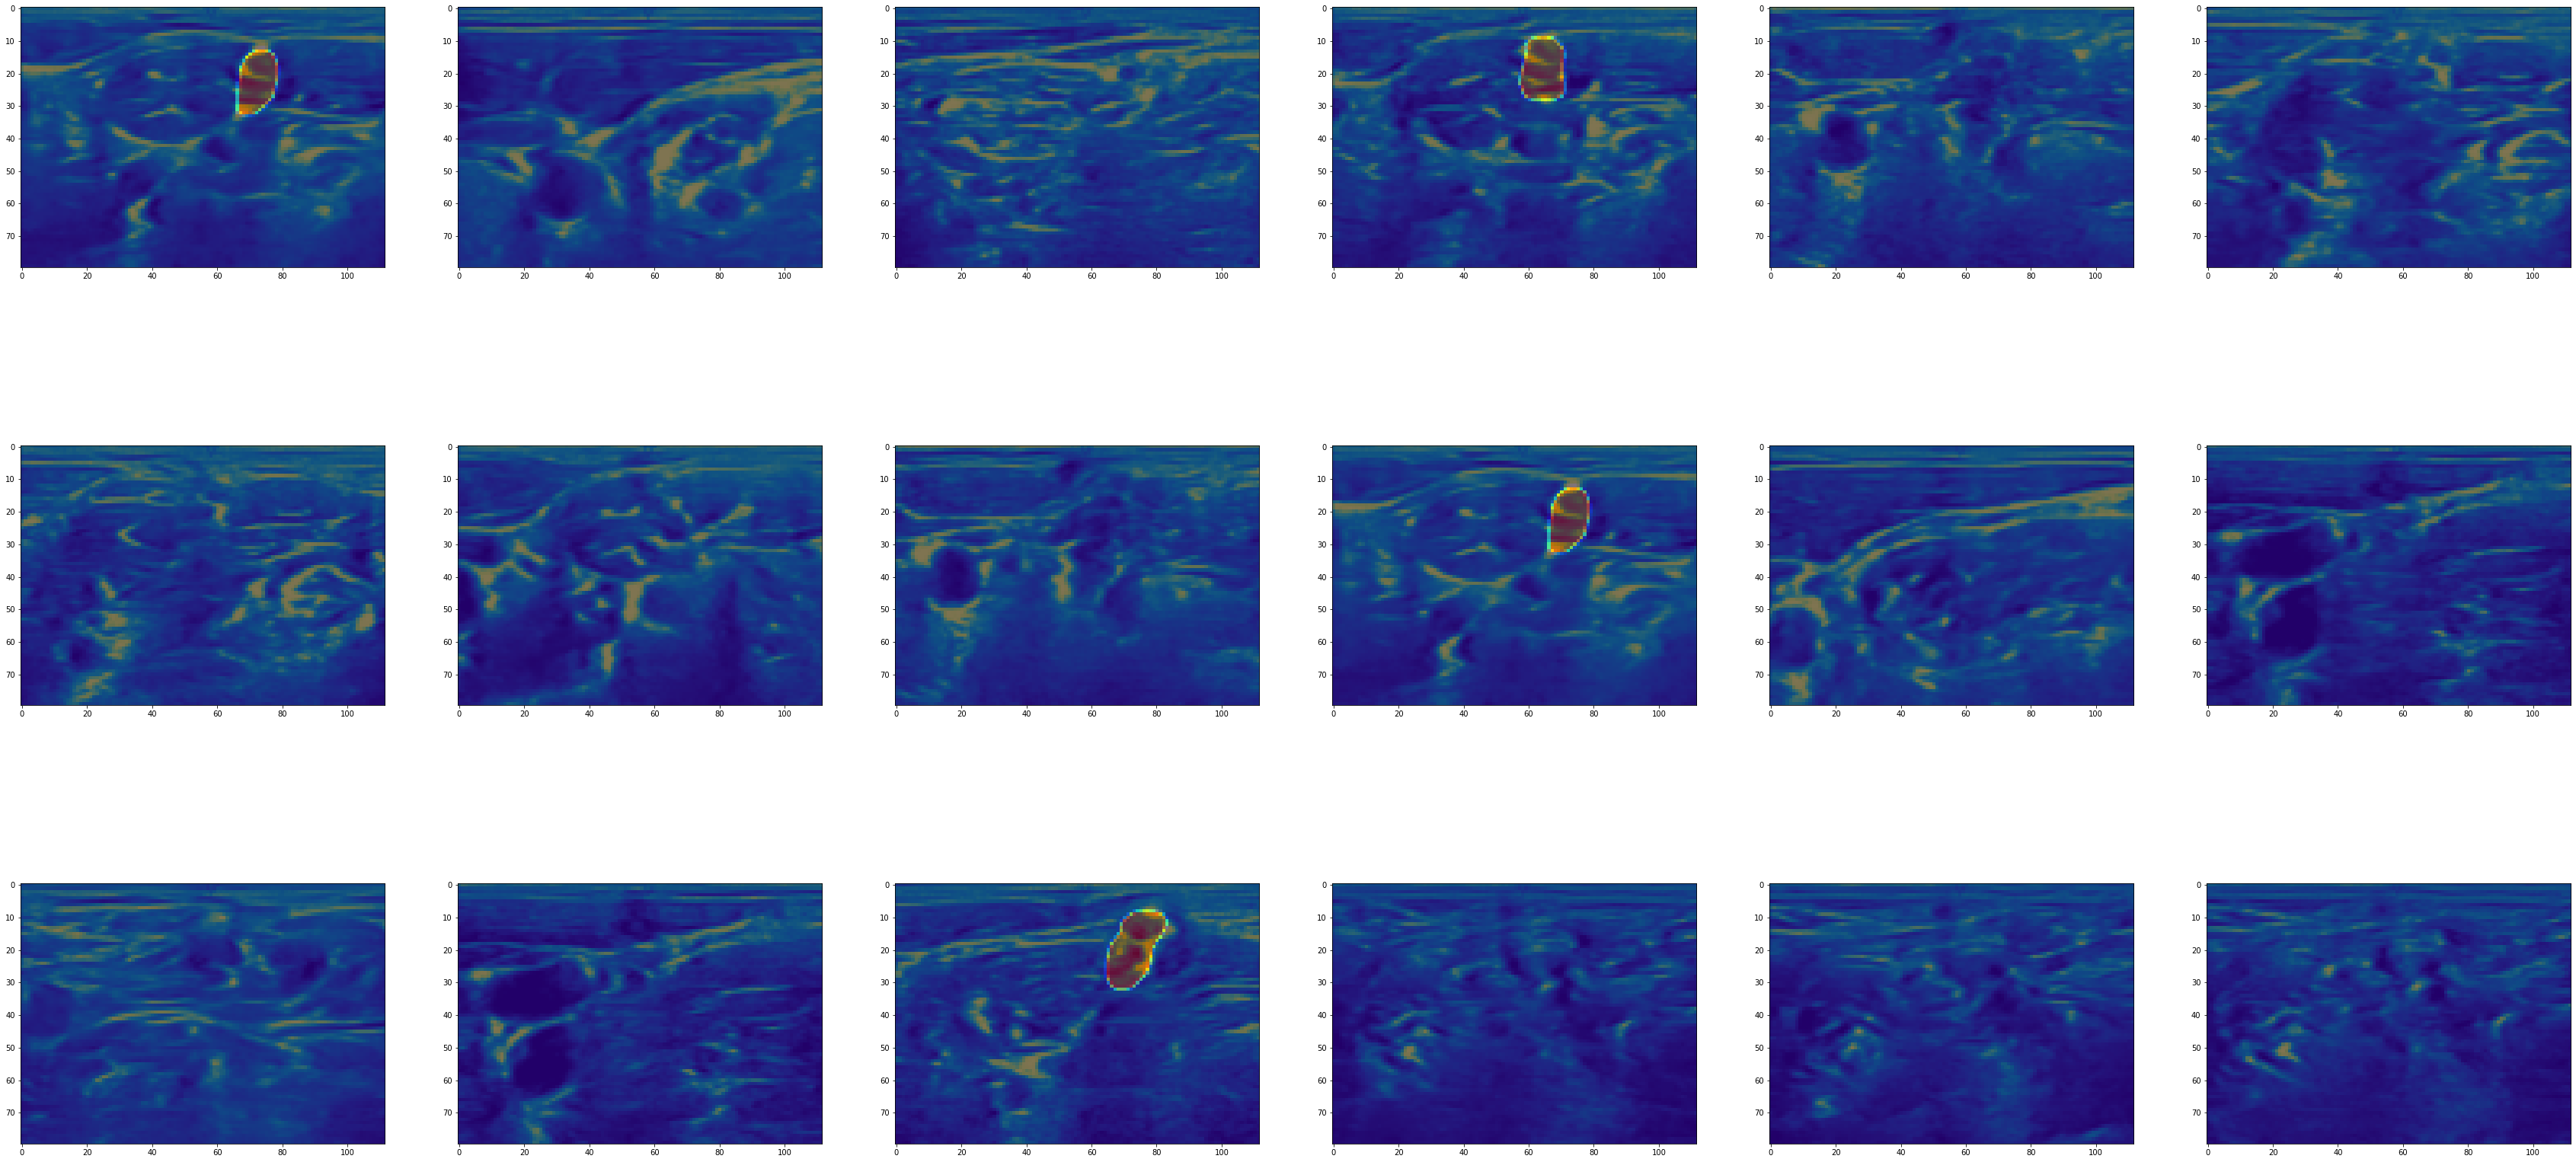


--------------------------------------------
Predicted masks:


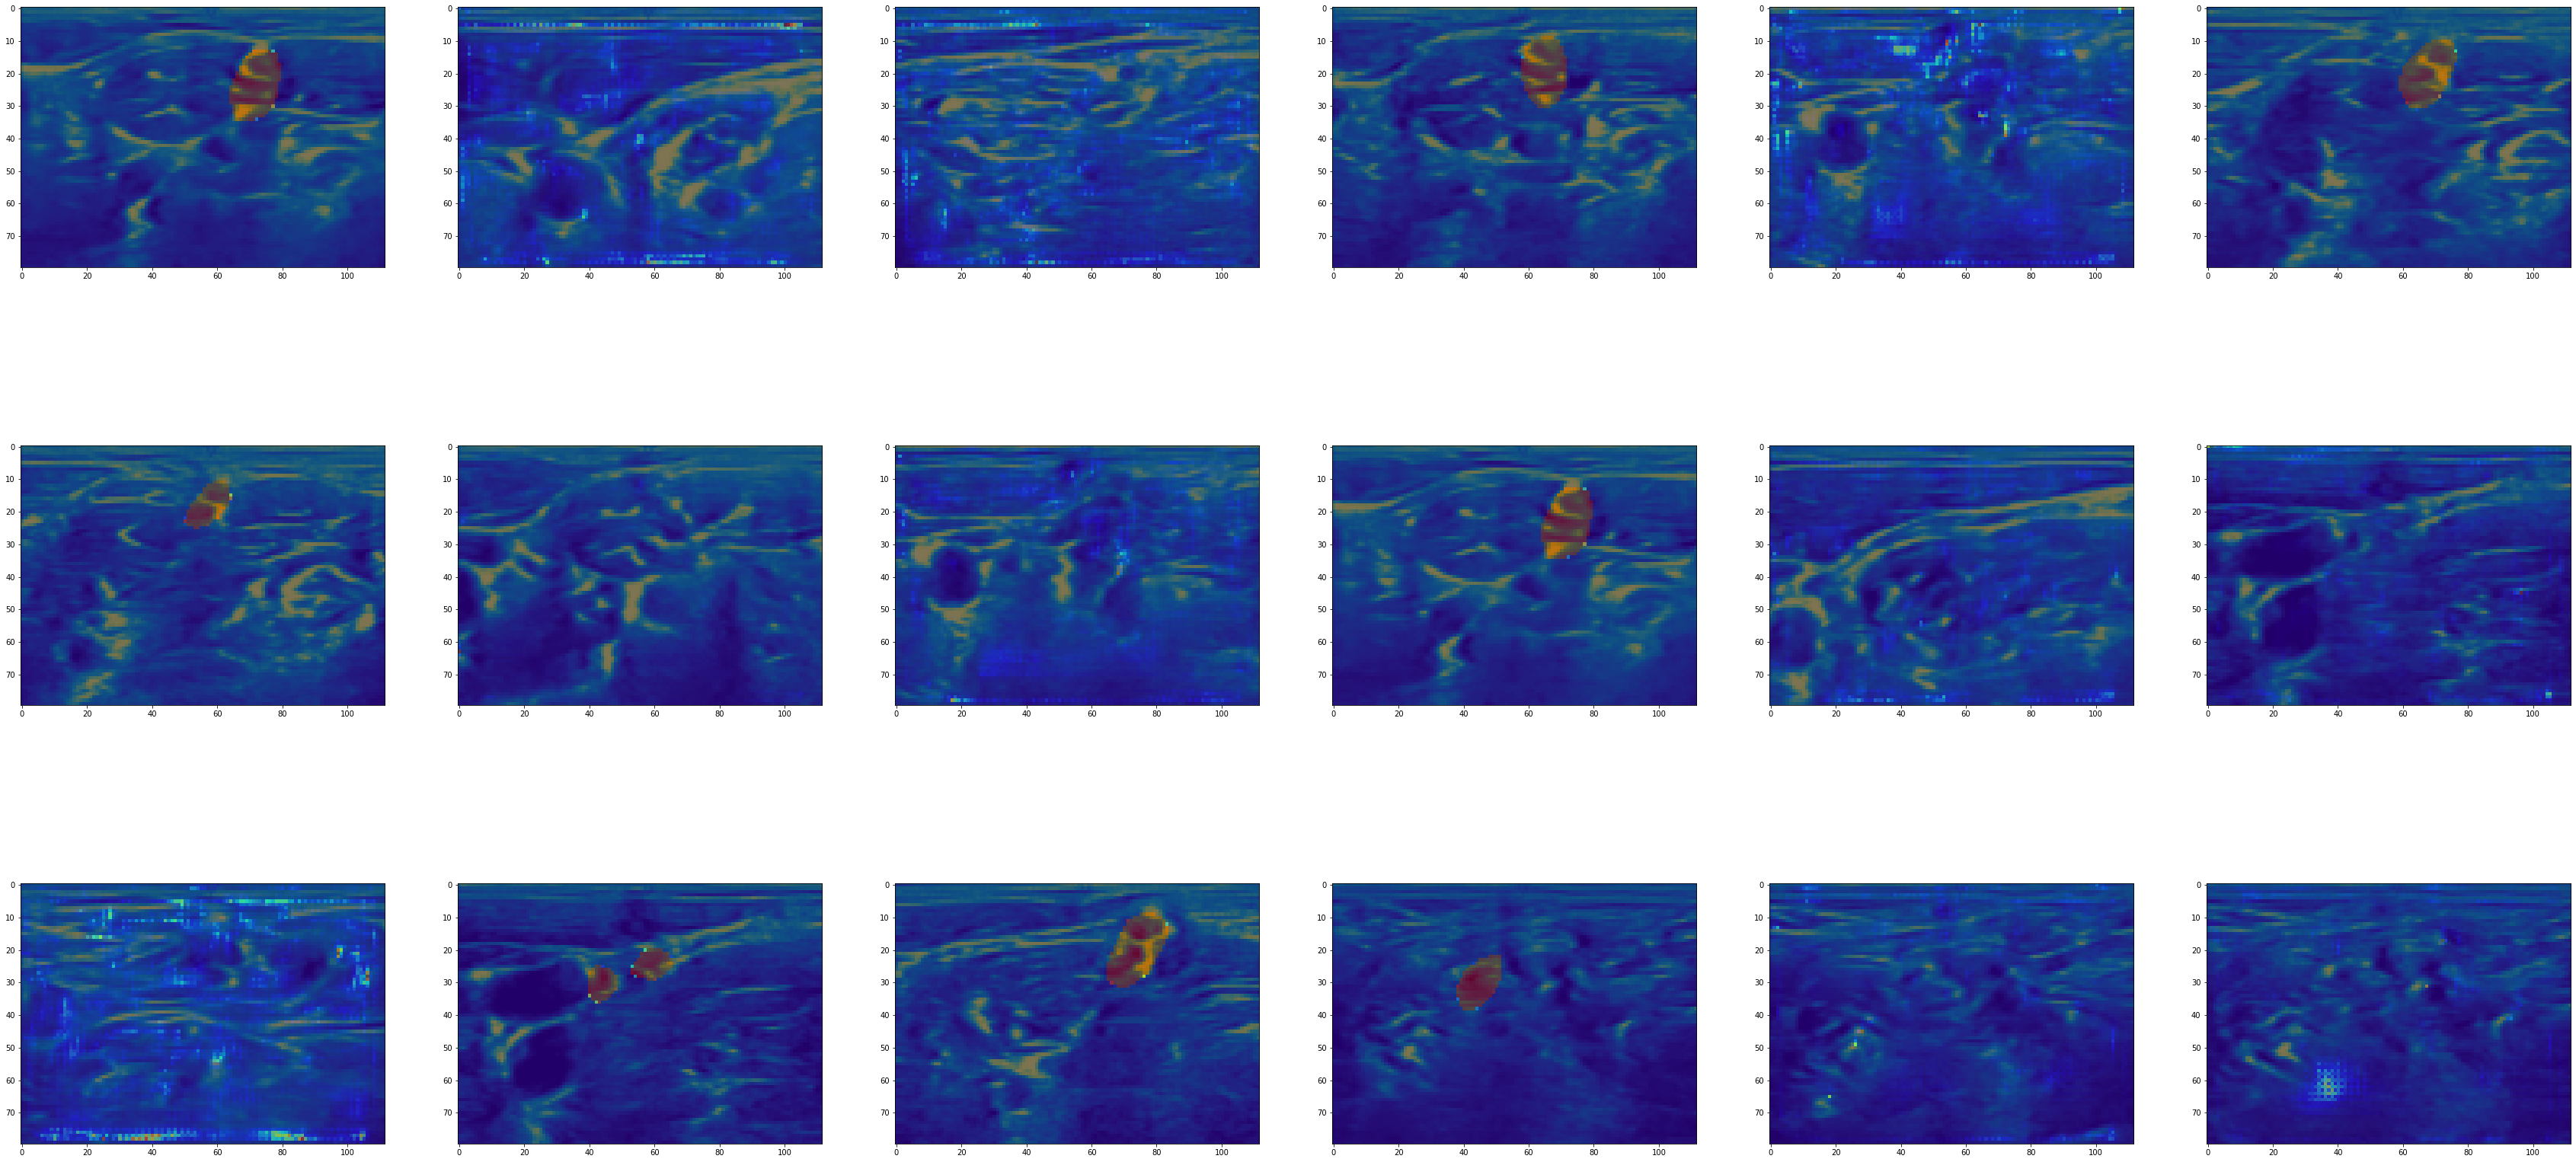

In [8]:
# ploting different images and masks 
from matplotlib import pyplot as plt
FIG_SIZE = 50
NUM_ROWS = 3
NUM_COLS = 6
THRESH = 0.8

print('True masks:')
ii_val = np.random.choice(len(imgs_val), NUM_ROWS * NUM_COLS)
plt.figure(figsize=[NUM_COLS*10,NUM_ROWS*10])
for i in range(NUM_ROWS * NUM_COLS):
    plt.subplot(NUM_ROWS, NUM_COLS ,i+1)
    img = imgs_val[ii_val[i], :, :, 0]
    mask = imgs_mask_val[ii_val[i], :, :, 0]
    plt.imshow(img)
    plt.imshow(mask, cmap='jet', alpha=0.5)
plt.show()

print('\n--------------------------------------------')
print('Predicted masks:')
plt.figure(figsize=[NUM_COLS*10,NUM_ROWS*10])
for i in range(NUM_ROWS * NUM_COLS):
    plt.subplot(NUM_ROWS, NUM_COLS ,i+1)
    img = imgs_val[ii_val[i], :, :, 0]
    mask_pred = seg_model.predict(np.expand_dims(imgs_val[ii_val[i]], axis=0))
    plt.imshow(img)
    plt.imshow(mask_pred[0, :, :, 0], cmap='jet', alpha=0.5)
plt.show()